* Ссылки 
  * [Гайд по SNS](https://nagornyy.me/courses/data-science/intro-to-seaborn/).<br>
  * [Построение графиков](https://pcnews.ru/blogs/spargalka_po_vizualizacii_dannyh_v_python_s_pomosu_plotly-986119.html).<br>
  * [Продвинутая визуализация](https://habr.com/ru/company/skillfactory/blog/510320/).<br>
  * [Все графики](https://prog-help.ru/python/kollekcija-prodvinutoj-vizualizacii-v-matplotlib-i-seaborn-s-primerami/).<br>

In [1]:
from pylab import rcParams
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
import numpy as np
import pandas as pd
import plotly
from IPython.display import Image
import matplotlib
from IPython.core.interactiveshell import InteractiveShell
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 16, 10
pd.set_option('display.width', 85)
pd.set_option('display.max_columns', 8)
init_notebook_mode(connected=True)
pd.options.display.float_format = '{:,.1f}'.format
InteractiveShell.ast_node_interactivity = 'all'

df = pd.read_csv('df.csv')

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('precision', 2)

In [4]:
df.columns = ['SEQN', 'Alcohol101', 'Alcohol110', 'Alcohol130', 'Smoking', 'Gender',
       'Age', 'Race', 'Country', 'Education', 'Family', 'HouseSize',
       'Salary', 'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BloodPressureSY1', 'BloodPressureDI1', 'BloodPressureSY2',
       'BloodPressureDI2', 'Weight', 'Height', 'BodyIndex', 'BodyLeg', 'BodyArm', 'BodyArm2',
       'BodyWaist', 'HIQ210']

In [5]:
df.head()

,SEQN,Alcohol101,Alcohol110,Alcohol130,Smoking,Gender,Age,Race,Country,Education,Family,HouseSize,Salary,SDMVPSU,SDMVSTRA,INDFMPIR,BloodPressureSY1,BloodPressureDI1,BloodPressureSY2,BloodPressureDI2,Weight,Height,BodyIndex,BodyLeg,BodyArm,BodyArm2,BodyWaist,HIQ210
0,83732,1.0,nan,1.0,1,1,62,3,1.0,5.0,1.0,2,"134,671.4",1,125,4.4,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,nan,6.0,1,1,53,3,2.0,3.0,3.0,1,"24,328.6",1,125,1.3,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,nan
2,83734,1.0,nan,nan,1,1,78,3,1.0,3.0,1.0,2,"12,400.0",1,131,1.5,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,"102,718.0",1,131,5.0,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,"17,627.7",2,126,1.2,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [6]:
# Преобразуем числовые данные в объектные
df['Gender'] = df.Gender.replace({1: "Male", 2: "Female"})
df['Education'] = df.Education.replace(
    {1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 7: "Refused", 9: "Don't know"})
df['Family'] = df.Family.replace({1: "Married", 2: "Widowed", 3: "Divorced",
                                  4: "Separated", 5: "Never married", 6: "Living w/partner", 77: "Refused"})

In [7]:
# Добавим новый столбец, с массой тела, умноженной на 10
df["dot_size"] = df.BodyIndex*10

In [9]:
# Уменьшим фрейм
df = df.loc[:500, :]
df.shape

(501, 29)

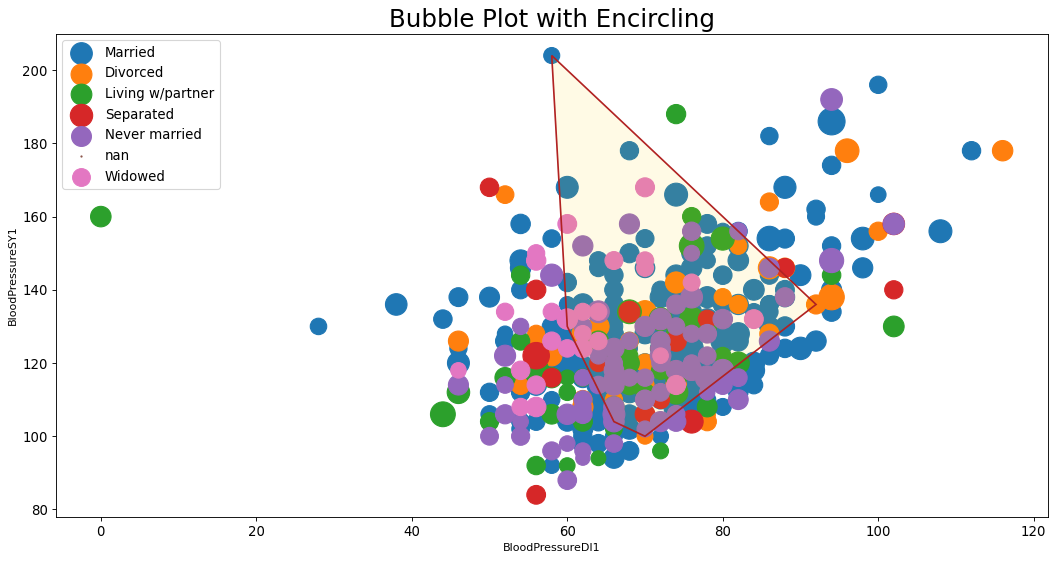

In [11]:
# Диаграмма рассеяния
from scipy.spatial import ConvexHull

# Функция, которая добавляет в график очерченную область, где переменные предикторов соответствуют определенному критерию
from scipy.spatial import ConvexHull
def encircle(x, y, ax=None, **kw):
    if not ax:
        ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)

category = df['Family'].unique()

plt.figure(figsize=(16, 8), dpi=80, facecolor="w", edgecolor="k")
for i, cat in enumerate(category):
    plt.scatter("BloodPressureDI1", "BloodPressureSY1",  # X Y
                # В каждом цикле проходим по одному значению переменных из колонки
                data=df.loc[df.Family == cat, :],
                s='dot_size',  # ЗАвисимость размера точки от значения в другой колонке фрейма
                label=str(cat))

# Задаем целевой предиктор
df_encircle = df.loc[(df["Age"] > 40), :].dropna()
# Ограничиваем область и делаем ей заливку
encircle(df_encircle.BloodPressureDI1, df_encircle.BloodPressureSY1, ec="k", fc="gold", alpha=0.1)
encircle(df_encircle.BloodPressureDI1, df_encircle.BloodPressureSY1,
         ec="firebrick", fc="none", linewidth=1.5)

plt.gca().set(xlabel='BloodPressureDI1', ylabel='BloodPressureSY1')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)
plt.show();

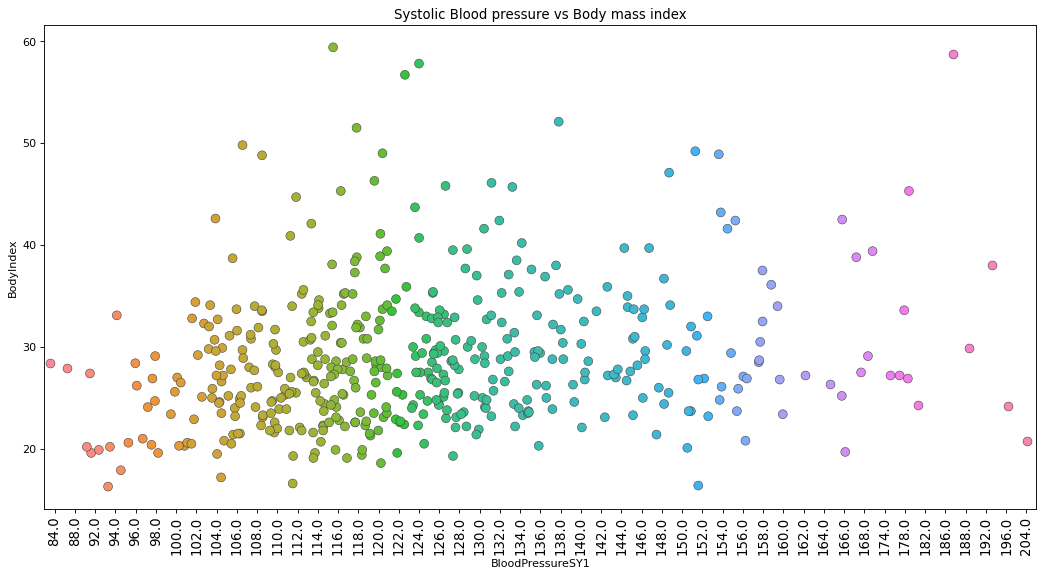

In [12]:
# точечная диаграмма
fig, ax = plt.subplots(figsize=(16, 8), dpi=80)
sns.stripplot(df.BloodPressureSY1, df.BodyIndex, jitter=0.45, size=8, ax=ax, linewidth=0.5)
plt.title("Systolic Blood pressure vs Body mass index")
plt.tick_params(axis='x', which='major', labelsize=12, rotation=90)
plt.show();

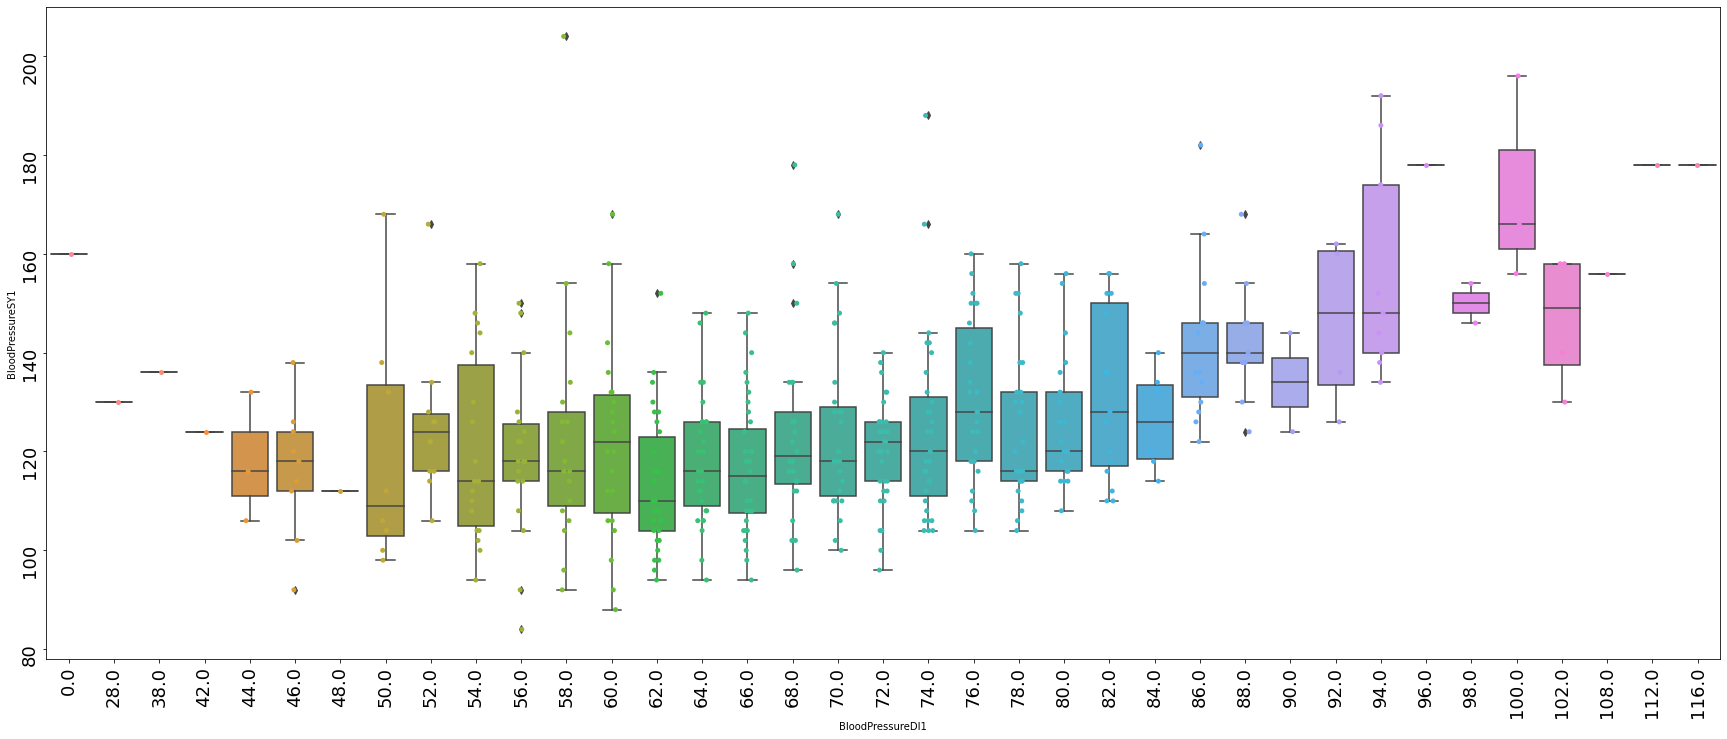

In [13]:
# Точечные диаграммы с ящиками помогают когда данных очень много
fig, ax = plt.subplots(figsize=(30, 12))
ax = sns.boxplot(x="BloodPressureDI1", y = "BloodPressureSY1", data=df)
ax.tick_params(rotation=90, labelsize=18)
ax = sns.stripplot(x = "BloodPressureDI1", y = "BloodPressureSY1", data=df)

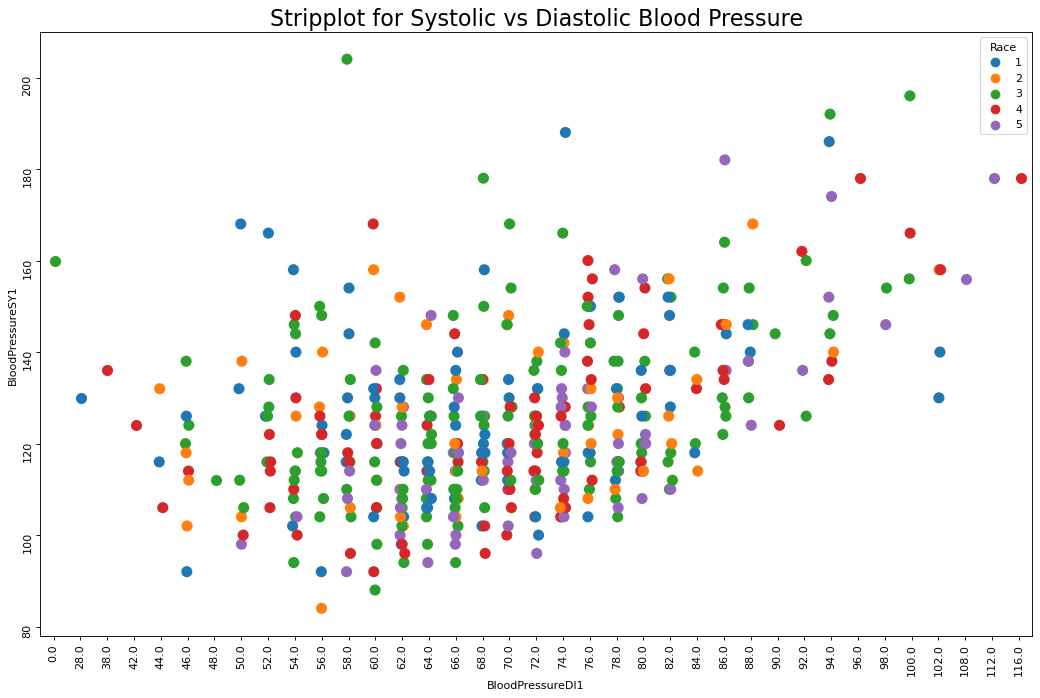

In [14]:
# Точечная диаграмма, разделенная по дополнительному предиктору (hue)
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df.BloodPressureDI1, df.BloodPressureSY1, s=10, hue = df.Race, ax=ax)
plt.title("Stripplot for Systolic vs Diastolic Blood Pressure", fontsize=20)
plt.tick_params(rotation=90)
plt.show();

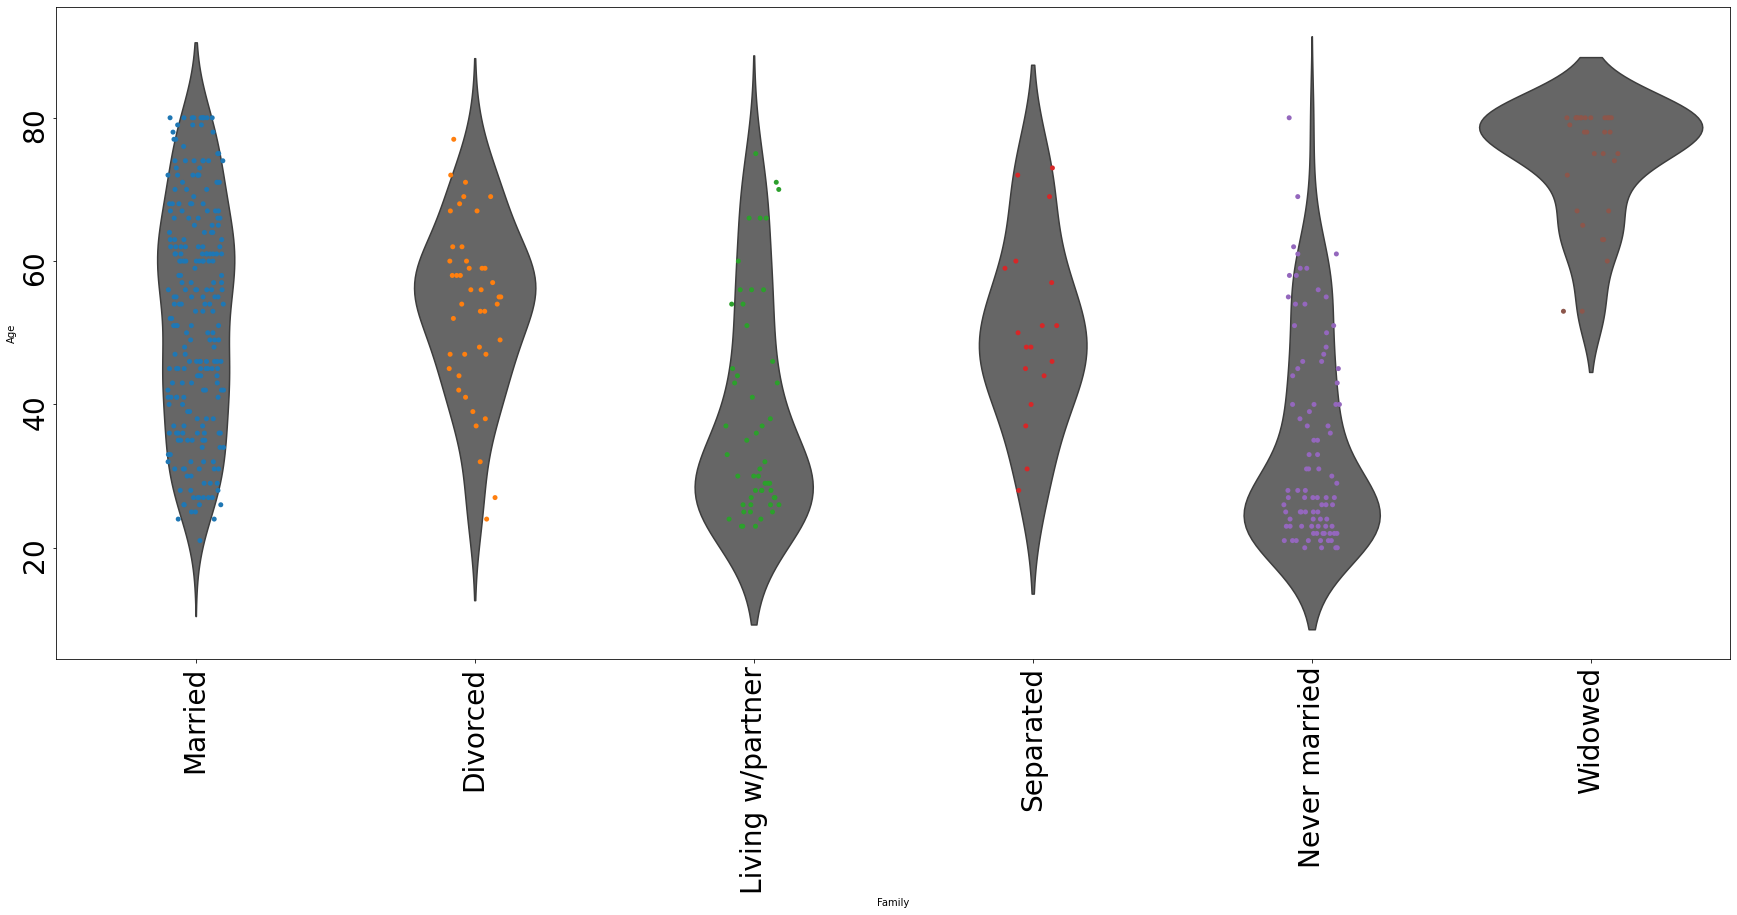

In [15]:
#Скрипичная диаграмма
fig, ax = plt.subplots(figsize=(30, 12))
ax = sns.violinplot(x= "Family", y="Age", data=df, inner=None, color="0.4")
ax = sns.stripplot(x= "Family", y="Age", data=df)
ax.tick_params(rotation=90, labelsize=28)

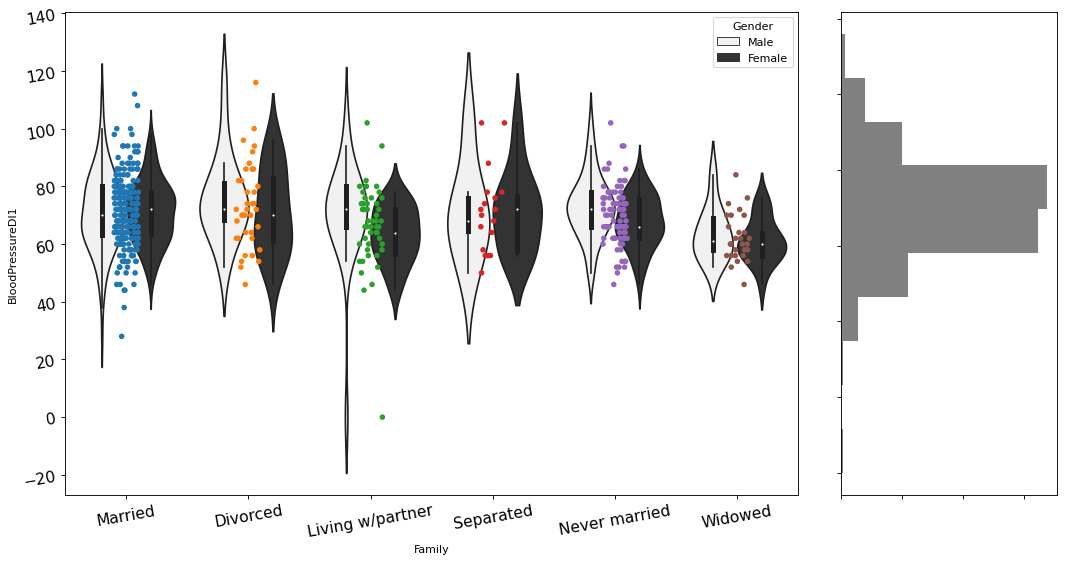

In [16]:
# Скрипичная диаграмма зависимости отклика от предиктора, с разделением по второму предиктору (hue) 
fig = plt.figure(figsize=(16, 8), dpi=80)

# Добавление второго графика, справа
grid=plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
ax_main = fig.add_subplot(grid[:, :-1])
ax_right = fig.add_subplot(grid[:, -1], xticklabels=[], yticklabels=[])

sns.violinplot(x= "Family", y = "BloodPressureDI1", hue = "Gender", data = df, color= "0.2", ax=ax_main)
sns.stripplot(x= "Family", y = "BloodPressureDI1", data = df, ax=ax_main)

ax_right.hist(df.BloodPressureDI1, histtype='stepfilled', orientation='horizontal', color='grey')
ax_main.title.set_fontsize(14)
ax_main.tick_params(rotation=10, labelsize=14)

plt.show();

Text(0.5, 1.0, 'Height vs weight with line of best fit grouped by Gender')

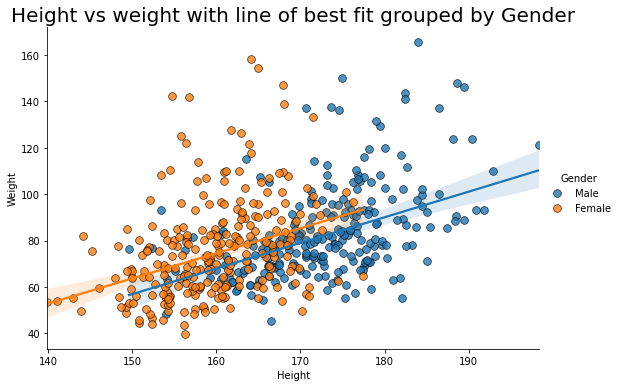

In [17]:
# Диаграммы с линией линейной регрессии. Зависимость отклика от предиктора, разделенных по доп. предиктору

g = sns.lmplot(x='Height', y='Weight', hue='Gender', data=df,
               aspect=1.5, robust=True, palette='tab10',
               scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title("Height vs weight with line of best fit grouped by Gender", fontsize=20)
plt.show()

<Figure size 1600x640 with 0 Axes>

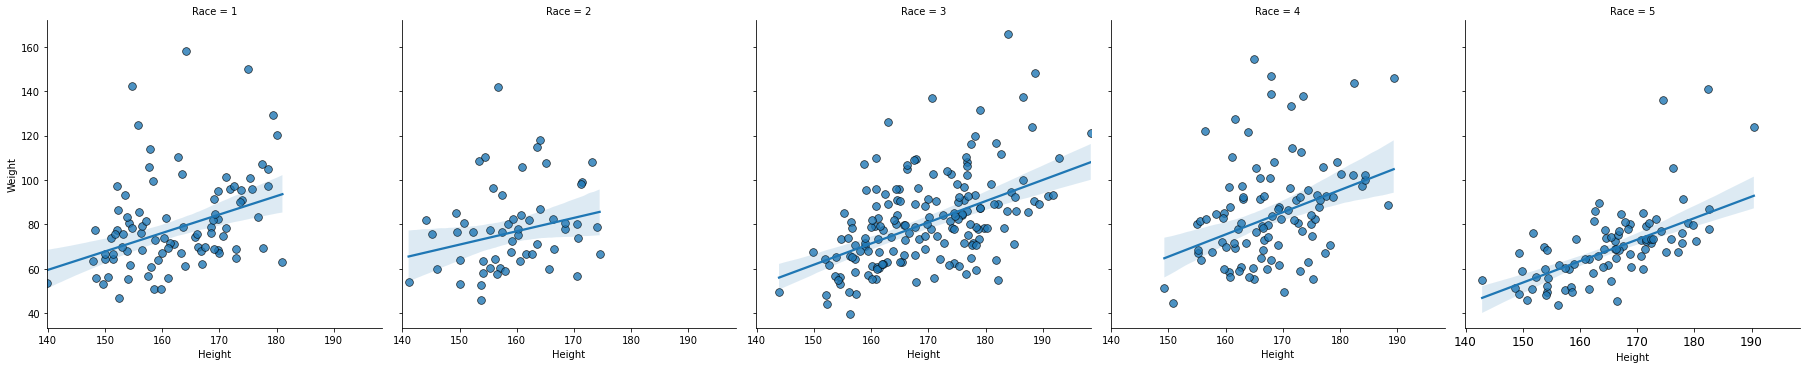

In [18]:
# Индивидуальные диаграммы с линией регрессии. Отклик и предиктор с доп. графиками для второго предиктора

fig = plt.figure(figsize=(20, 8), dpi=80)
g = sns.lmplot(x='Height', y='Weight', data = df, robust = True,
              palette="Set1", col="Race", # Указываем на разделение на колонки по параметрам в доп. предикторе
              scatter_kws=dict(s=60, linewidths=0.7, edgecolors="black"))
plt.xticks(fontsize=12, )
plt.yticks(fontsize=12)
plt.show();

<Figure size 800x640 with 0 Axes>

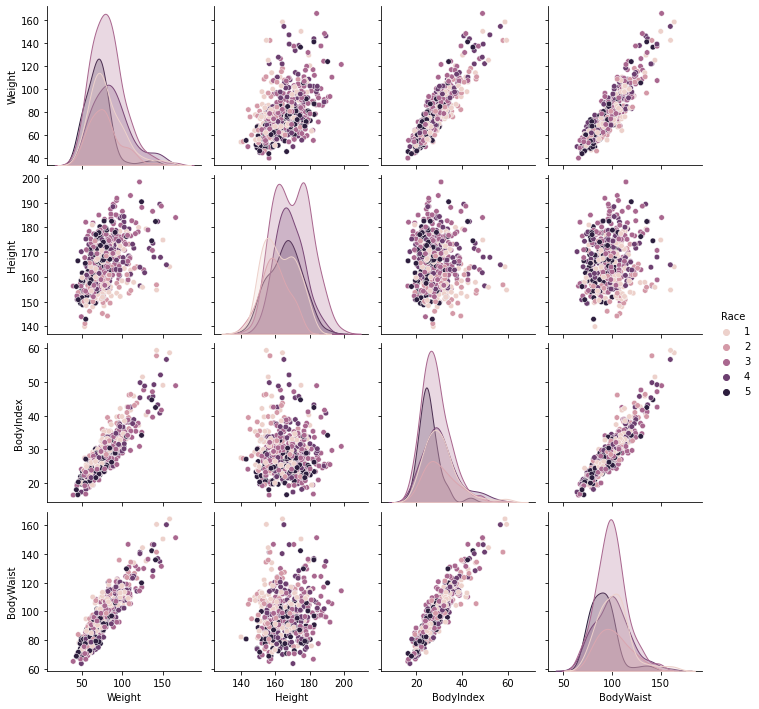

In [19]:
# Парные диаграммы для EDA.Взаимозависимости 4 пар предикторов, разделенных по пятому
plt.figure(figsize=(10,8), dpi= 80)
sns.color_palette("hls", 8)
sns.pairplot(df[['Weight', 'Height', 'BodyIndex', 'BodyWaist', "Race"]], kind="scatter", hue="Race", plot_kws=dict(s=30))
plt.show();

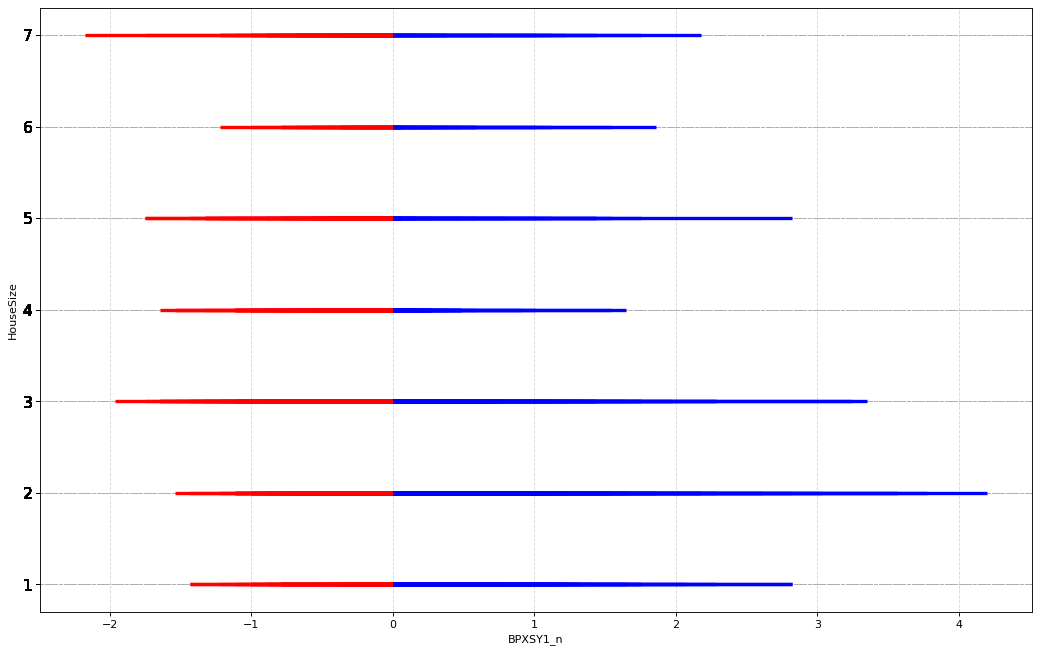

In [20]:
# Расходящиеся столбики

x = df.loc[:, "BloodPressureSY1"]
df["BloodPressureSY1_n"] = (x - x.mean())/x.std()  # Стандартизируем данные
# Задаем цвета для положительных и отрицательных значений
df['colors'] = ['red' if i < 0 else 'blue' for i in df["BloodPressureSY1_n"]]
df.sort_values("BloodPressureSY1_n", inplace=True)
df.reset_index(inplace=True)
plt.figure(figsize=(16, 10), dpi=80)
plt.hlines(y=df.HouseSize, xmin=0, xmax=df.BloodPressureSY1_n,
           color=df.colors, linewidth=3)  # Центрируем по стандартизированным
plt.gca().set(ylabel="HouseSize", xlabel="BPXSY1_n")
plt.yticks(df.HouseSize, fontsize=14)
plt.grid(linestyle='--', alpha=0.5)
plt.show();

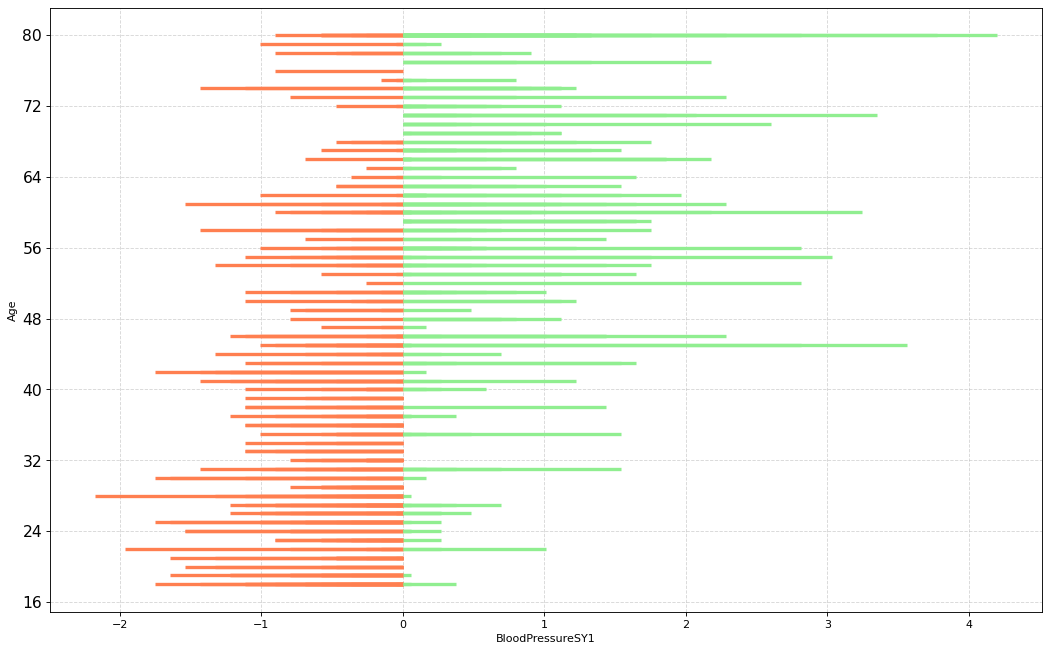

In [21]:
# Расходящиеся столбики
x = df.loc[:, "BloodPressureSY1"]
df['colors'] = ['coral' if i < 0 else 'lightgreen' for i in df["BloodPressureSY1_n"]]
y_ticks = np.arange(16, 82, 8) #Задаем шкалу для оси Y. старт, стоп, шаг
plt.figure(figsize=(16, 10), dpi=80)
plt.hlines(y = df.Age, xmin=0, xmax = df.BloodPressureSY1_n, color=df.colors, linewidth=3)
plt.gca().set(ylabel="Age", xlabel = "BloodPressureSY1")
plt.yticks(y_ticks, fontsize=14)
plt.grid(linestyle='--', alpha=0.5)
plt.show();

In [22]:
df[df['Gender'] == 'Male']['Salary'].agg(np.median) 
df[(df['Gender'] == 'Male') & (df['Family'] != 'Married')]['Salary'].agg(np.median)

25558.45

28034.78

In [23]:
# средние показатели предикторов, сгруппированных для другого
df.groupby(['Gender'])[['HouseSize', 'Age', 'Salary']].agg(np.median)

,HouseSize,Age,Salary
Gender,,,
Female,3,45,"26,075.1"
Male,3,50,"25,558.5"


In [24]:
# Выделение нового предиктора на основе произвольных действий с другими
df['Rich'] = (df['Salary'] > df['Salary'].quantile(.75)).astype(int) #Верхняя четверть богатых

In [25]:
def binar_gender(gender):
    return 0 if gender == "Female" else 1
df['Gender'].apply(binar_gender).describe()

count   501.0
mean      0.5
std       0.5
min       0.0
25%       0.0
50%       0.0
75%       1.0
max       1.0
Name: Gender, dtype: float64

In [26]:
num_feat = [x for x in df.columns if df[x].dtype !="object"]
df[num_feat].apply(np.mean)

index                   250.0
SEQN                 84,167.0
Alcohol101                1.3
Alcohol110                1.6
Alcohol130                2.8
Smoking                   1.6
Age                      47.5
Race                      3.0
Country                   1.2
HouseSize                 3.3
Salary               42,080.7
SDMVPSU                   1.5
SDMVSTRA                126.2
INDFMPIR                  2.4
BloodPressureSY1        124.9
BloodPressureDI1         69.5
BloodPressureSY2        124.6
BloodPressureDI2         69.1
Weight                   80.2
Height                  166.2
BodyIndex                29.0
BodyLeg                  38.6
BodyArm                  37.0
BodyArm2                 32.8
BodyWaist                98.7
HIQ210                    1.9
dot_size                289.7
BloodPressureSY1_n       -0.0
Rich                      0.2
dtype: float64

In [27]:
df.sort_values('Age', ascending=False)

,index,SEQN,Alcohol101,Alcohol110,Alcohol130,Smoking,Gender,Age,Race,Country,Education,Family,HouseSize,Salary,SDMVPSU,SDMVSTRA,INDFMPIR,BloodPressureSY1,BloodPressureDI1,BloodPressureSY2,BloodPressureDI2,Weight,Height,BodyIndex,BodyLeg,BodyArm,BodyArm2,BodyWaist,HIQ210,dot_size,BloodPressureSY1_n,colors,Rich
418,226,84115,2.0,1.0,nan,1,Male,80,5,1.0,HS/GED,Married,2,"17,156.0",2,132,nan,148.0,64.0,142.0,66.0,68.7,164.2,25.5,39.6,39.6,31.2,101.7,2.0,255.0,1.2,lightgreen,0
466,111,83932,2.0,1.0,1.0,2,Female,80,3,1.0,Some college/AA,Married,2,"47,792.4",1,130,3.1,178.0,68.0,186.0,70.0,65.7,156.3,26.9,30.7,35.9,30.5,94.0,2.0,269.0,2.8,lightgreen,1
362,235,84129,1.0,nan,4.0,1,Male,80,5,1.0,<9,Married,2,"17,791.5",2,132,0.8,136.0,60.0,130.0,56.0,48.2,154.0,20.3,35.5,34.5,26.2,77.9,1.0,203.0,0.6,lightgreen,0
80,345,84336,2.0,2.0,nan,2,Female,80,3,1.0,College,Widowed,1,"43,783.4",1,126,2.1,108.0,54.0,104.0,56.0,56.9,153.7,24.1,nan,34.8,25.2,86.0,2.0,241.0,-0.9,coral,0
278,258,84178,1.0,nan,1.0,1,Male,80,3,1.0,9-11,Married,6,"26,833.6",2,132,2.4,126.0,52.0,110.0,54.0,90.2,175.2,29.4,43.2,42.3,30.3,115.5,2.0,294.0,0.1,lightgreen,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,172,84025,1.0,nan,1.0,2,Female,18,3,1.0,NaN,NaN,7,"41,690.8",2,127,1.2,112.0,48.0,104.0,50.0,96.2,168.2,34.0,41.4,36.8,37.6,92.7,2.0,340.0,-0.7,coral,0
4,413,84450,2.0,2.0,nan,2,Female,18,1,1.0,NaN,NaN,3,"14,700.0",2,125,1.0,92.0,46.0,92.0,48.0,50.7,159.7,19.9,37.0,35.1,23.8,73.5,2.0,199.0,-1.7,coral,0
85,487,84580,1.0,nan,4.0,2,Male,18,5,1.0,NaN,NaN,3,"10,364.0",2,128,nan,108.0,58.0,112.0,52.0,86.9,182.5,26.1,47.2,40.4,32.7,96.9,2.0,261.0,-0.9,coral,0
110,375,84391,2.0,2.0,nan,2,Male,18,3,1.0,NaN,NaN,3,"89,924.8",1,130,4.6,112.0,60.0,114.0,58.0,55.1,182.1,16.6,45.1,39.7,24.0,67.0,2.0,166.0,-0.7,coral,1


In [28]:
pd.crosstab(df['Gender'], df['Rich'], normalize=True)

Rich,0,1
Gender,,
Female,0.4,0.1
Male,0.4,0.1


In [29]:
df.pivot_table(['Age', 'Salary'], ['Gender'], aggfunc='median')

,Age,Salary
Gender,,
Female,45,"26,075.1"
Male,50,"25,558.5"


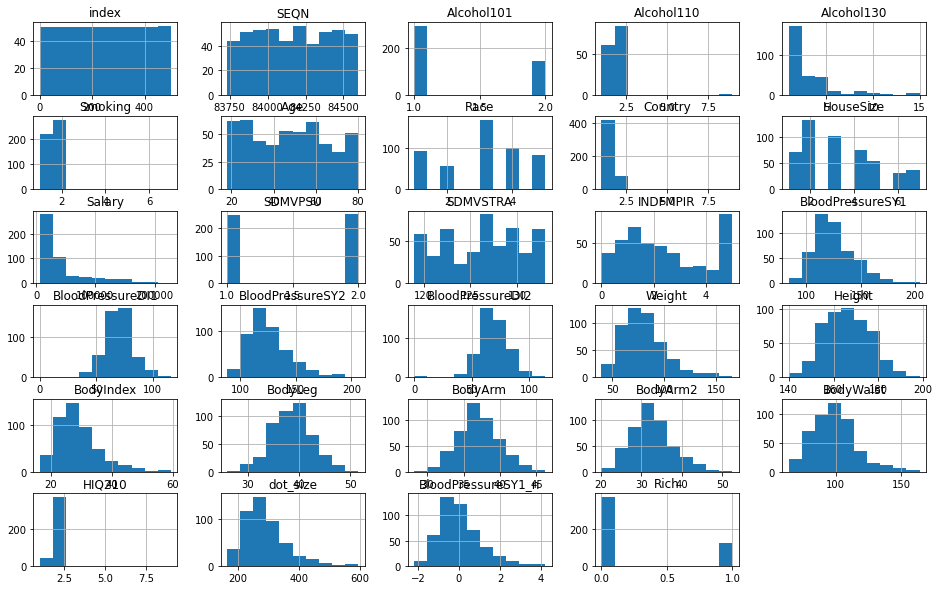

In [30]:
df.hist();

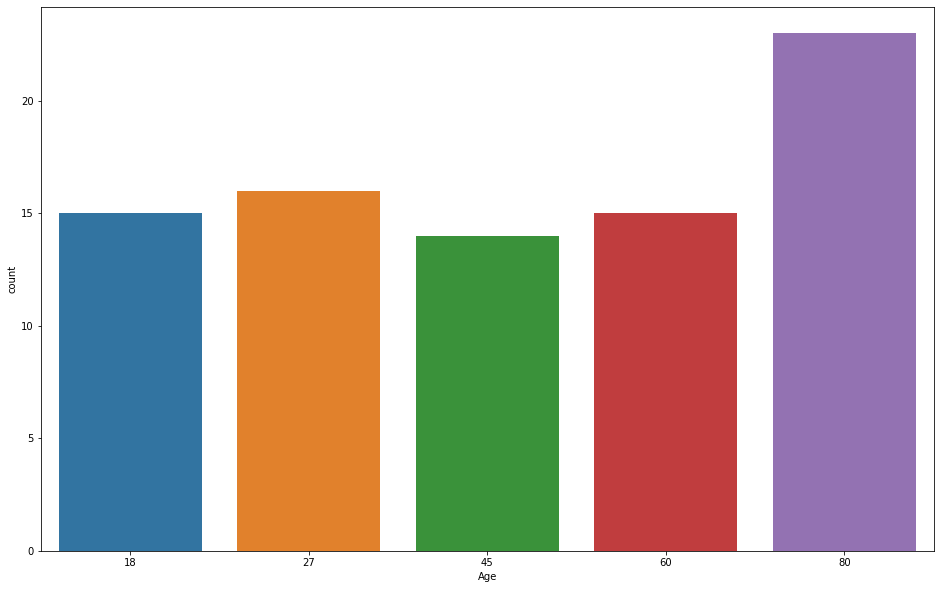

In [31]:
# Выборка для всего фрейма, ограниченная по заданным параметрам одного из предикторов(например, только топ-5 значений)
a = df[df['Age'].isin(df['Age'].value_counts().head().index)]
sns.countplot(a['Age']);

In [32]:
# Взаимодействие количественнях предикторов
num_feat = [x for x in df.columns if df[x].dtype !="object"]
num_feat.remove('index')

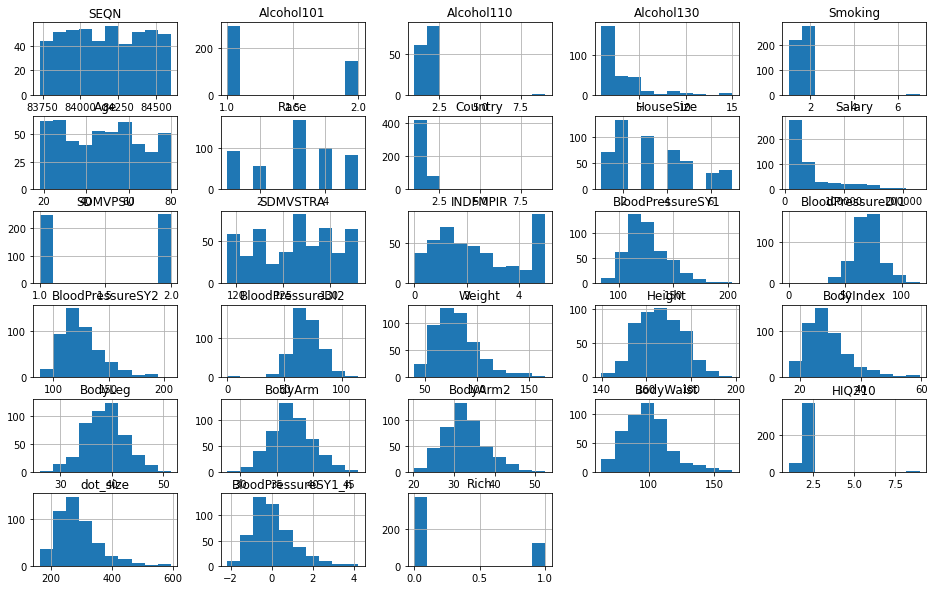

In [33]:
df[num_feat].hist();

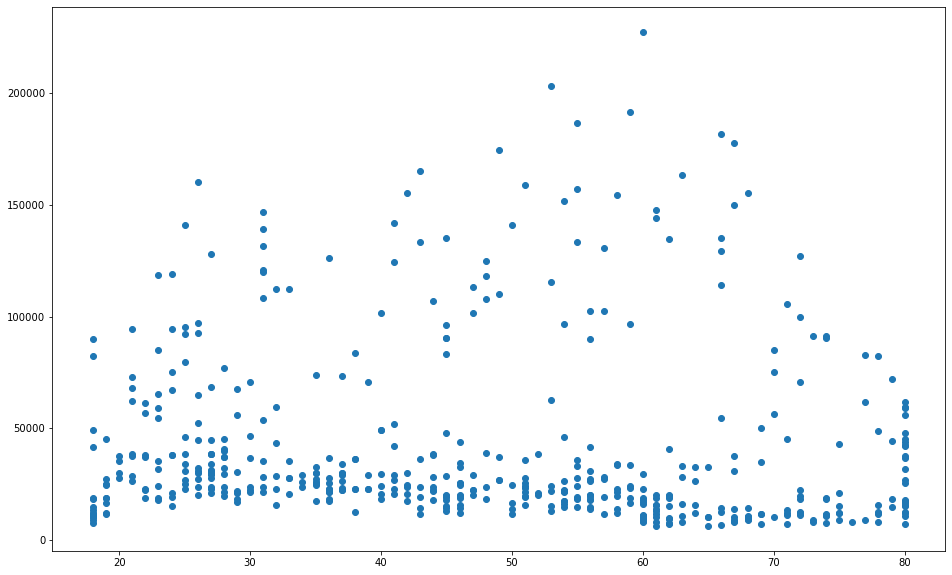

In [34]:
plt.scatter(df['Age'], df["Salary"]);